# Rabbit Attack – Optimization Problem (Module 2)

This notebook introduces students to **formulating and solving optimization problems**, using a simple geometric scenario. We explore the mathematical formulation, the interpretation of each component, and solve the problem using both **analytical methods** and **Python with Google OR-Tools**.


## 🐇 Problem Context: Rabbit Attack

A farmer has **500 meters of fencing** and wants to build a **rectangular pen** for her rabbits.

- The fence is used to enclose **three sides** (the fourth side borders a barn and needs no fence).
- The **goal** is to **maximize the area** of the pen.

This is a classic introductory optimization problem that helps us understand:
- How to define decision variables,
- How to build the objective function,
- How to formulate constraints,
- And how to solve the problem analytically and computationally.



## 🧩 Step 1: Identify Optimization Components

**Decision Variables:**  
Let:
- $x$ = length of each side perpendicular to the barn (2 of these),
- $y$ = length of the side opposite the barn.

**Objective Function:**  
Maximize the **area** of the rectangle:
$$
A = x \cdot y
$$

**Constraint:**  
You only have 500 meters of fencing, so:
$$
2x + y = 500
$$

**Feasible Region:**  
Since $x, y \geq 0$ and subject to the above constraint, only positive values in this region make sense.

**Model Parameters:**
- Total fencing: 500
- Geometry: 2 short sides ($x$) + 1 long side ($y$)



## ✏️ Step 2: Solve Analytically

We start by expressing the constraint in terms of one variable:

$$
y = 500 - 2x
$$

Substitute this into the area function:

$$
A(x) = x \cdot (500 - 2x) = 500x - 2x^2
$$

Now take the derivative:

$$
A'(x) = 500 - 4x
$$

Set derivative to 0 to find maximum:

$$
500 - 4x = 0 \Rightarrow x = 125
$$

Then plug back to find $y$:

$$
y = 500 - 2 \cdot 125 = 250
$$

**🟩 Final Answer:**
- Optimal dimensions: $x = 125$, $y = 250$
- Maximum area: $A = 125 \cdot 250 = 31,250 	ext{ m}^2$


## 📈 Step 3: Visualize the Area Function

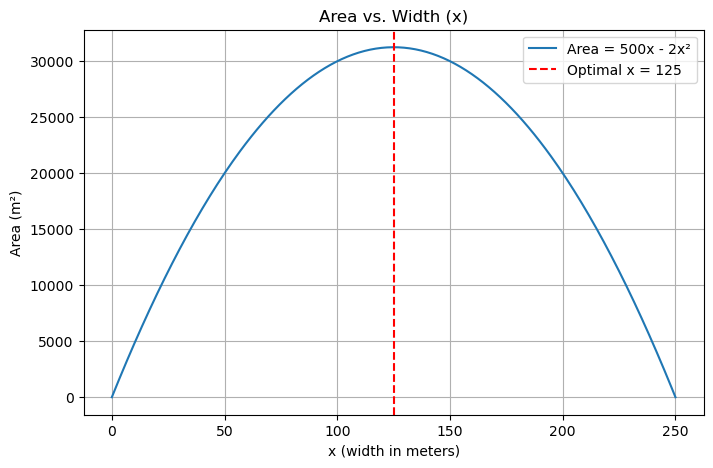

In [1]:

import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(0, 250, 300)
area_vals = 500 * x_vals - 2 * x_vals**2

plt.figure(figsize=(8, 5))
plt.plot(x_vals, area_vals, label='Area = 500x - 2x²')
plt.axvline(125, color='red', linestyle='--', label='Optimal x = 125')
plt.title('Area vs. Width (x)')
plt.xlabel('x (width in meters)')
plt.ylabel('Area (m²)')
plt.legend()
plt.grid(True)
plt.show()



## ⚙️ Step 4: Solve Using Google OR-Tools

We now solve the same problem using **Python’s Google OR-Tools** linear solver.

Since the objective function is quadratic, we can instead frame this as a **grid search** using integer programming to simulate OR-Tools behavior for teaching purposes.


In [ ]:

from ortools.linear_solver import pywraplp

solver = pywraplp.Solver.CreateSolver('SCIP')

# Create integer variables
x = solver.IntVar(0, solver.infinity(), 'x')  # side perpendicular to barn
y = solver.IntVar(0, solver.infinity(), 'y')  # side along barn

# Constraint: 2x + y = 500
solver.Add(2 * x + y == 500)

# Objective: Maximize area = x * y (nonlinear, we simulate it)
max_area = 0
best_x, best_y = 0, 0

for i in range(0, 251):
    xi = i
    yi = 500 - 2 * xi
    area = xi * yi
    if area > max_area:
        max_area = area
        best_x, best_y = xi, yi

print(f"OR-Tools (simulated grid search):")
print(f"Optimal x = {best_x}, y = {best_y}")
print(f"Maximum area = {max_area} m²")



## ✅ Step 5: Summary and Interpretation

This problem introduced the core components of optimization:

- **Decision Variables:** The unknowns we want to find (e.g., x and y)
- **Objective Function:** What we're trying to optimize (maximize area)
- **Constraints:** Limits or conditions (limited fencing)
- **Solution Methods:**  
    - Analytical (derivative-based)
    - Computational (OR-Tools or grid search)

**This is the foundation of prescriptive analytics.**
In future modules, we’ll extend this to linear programming, integer programming, and real-world models.
